/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Feature1  Feature2  Feature3  Feature4  Feature5  Cluster
0   83.6651   34.6162   32.3935   21.0897   16.5198        1
1   67.4062   32.1086   24.4290   15.0213   24.0132        1
2   57.4604   27.1139   34.4498   28.6085   37.3190        0
3   48.8191   28.0326   33.9426   26.0920   29.0326        0
4   50.3952   33.7845   22.8021   21.9918   24.9028        1


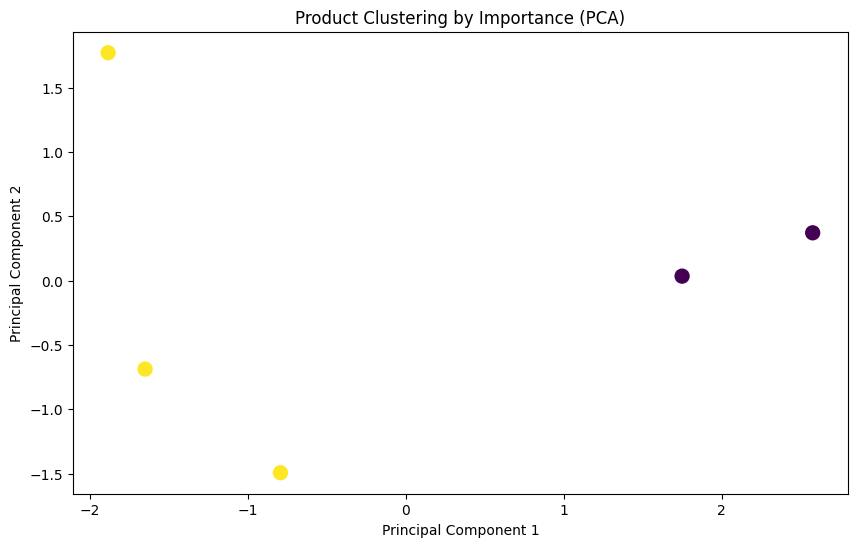

Silhouette Score: 0.42846101959364946


In [ ]:
# 구글 코랩에서 실행할 수 있는 Python 코드입니다.

# Step 1: 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 2: 데이터 정의하기
# 5개의 제품에 각각 5개의 항목에 대한 중요도 값이 있다고 가정합니다.
# 예시 데이터 (제품 5개, 항목 5개)
importance_values = np.array([
    [83.6651, 34.6162, 32.3935, 21.0897, 16.5198],  # 제품 1 닥터지(기능성, 사용감, 특성, 타입, 반응)
    [67.4062, 32.1086, 24.4290, 15.0213, 24.0132],  # 제품 2 라운드랩
    [57.4604, 27.1139, 34.4498, 28.6085, 37.3190],  # 제품 3 에스트라
    [48.8191, 28.0326, 33.9426, 26.0920, 29.0326],  # 제품 4 피지오겔
    [50.3952, 33.7845, 22.8021, 21.9918, 24.9028]   # 제품 5 토리든


])

# 데이터프레임으로 변환 (각 제품의 중요도 값을 피처로 사용)
data = pd.DataFrame(importance_values, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])

# Step 3: 데이터 표준화 (K-means는 데이터의 크기에 민감합니다.)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 4: K-means 클러스터링 수행
# 클러스터 개수를 설정 (예: 2개의 클러스터로 분류)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# 클러스터 라벨을 데이터프레임에 추가
data['Cluster'] = kmeans.labels_

# Step 5: 결과 출력
print(data)

# 클러스터 시각화 (PCA를 사용하여 2D 시각화)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
data_pca['Cluster'] = data['Cluster']

plt.figure(figsize=(10, 6))
plt.scatter(data_pca['PC1'], data_pca['PC2'], c=data_pca['Cluster'], cmap='viridis', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Product Clustering by Importance (PCA)')
plt.show()

from sklearn.metrics import silhouette_score

# 클러스터링 결과에 대한 실루엣 스코어 계산
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


   Feature1  Feature2  Feature3  Feature4  Feature5  Cluster
0   37.3322   41.5623   43.1336   12.8679   30.1282        0
1   36.1789   41.9610   46.2894   12.2381   27.5720        0
2   67.0829   29.7951   64.6114   17.7101    7.3543        1
3   42.3720   25.5205   26.7280   10.8329   41.6225        0
4   42.1373   23.8205   42.1456   15.6955   33.5214        0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-16-9e757f2ada04>:58: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,
<ipython-input-16-9e757f2ada04>:75: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariance = np.cov(cluster_data[['PC1', 'PC2']].T)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


LinAlgError: SVD did not converge

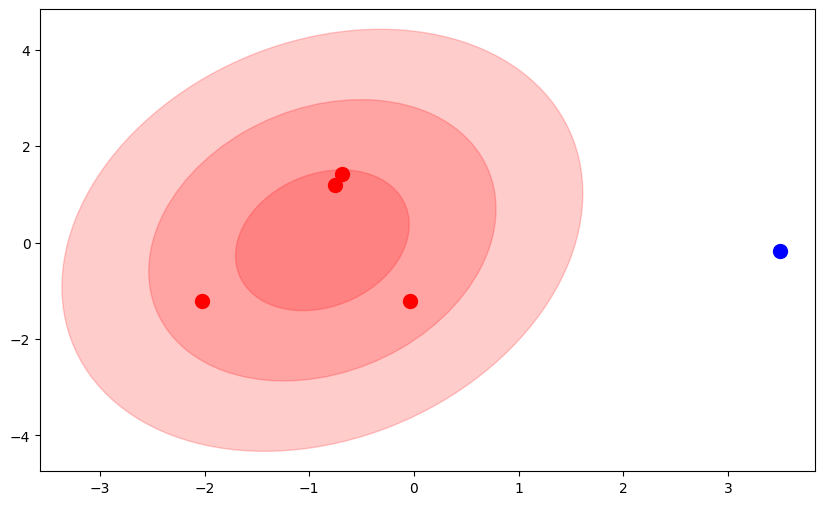

In [ ]:
# 구글 코랩에서 실행할 수 있는 Python 코드입니다.

# Step 1: 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Step 2: 데이터 정의하기
# 5개의 제품에 각각 5개의 항목에 대한 중요도 값이 있다고 가정합니다.
# 예시 데이터 (제품 5개, 항목 5개)
importance_values = np.array([
    [37.3322, 41.5623, 43.1336, 12.8679, 30.1282],  # 제품 1 토리든 (기능성, 사용감, 특성, 타입, 반응)
    [36.1789, 41.961, 46.2894, 12.2381, 27.572],  # 제품 2 라운드랩
    [67.0829, 29.7951, 64.6114, 17.7101, 7.3543],  # 제품 3 바이오더마
    [42.372, 25.5205, 26.728, 10.8329, 41.6225],  # 제품 4 아비브
    [42.1373, 23.8205, 42.1456, 15.6955, 33.5214]   # 제품 5 브링그린
])

# 데이터프레임으로 변환 (각 제품의 중요도 값을 피처로 사용)
data = pd.DataFrame(importance_values, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])

# Step 3: 데이터 표준화 (K-means는 데이터의 크기에 민감합니다.)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
#Step 4: K-means 클러스터링 수행
# 클러스터 개수를 설정 (예: 2개의 클러스터로 분류)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# 클러스터 라벨을 데이터프레임에 추가
data['Cluster'] = kmeans.labels_

# Step 5: 결과 출력
print(data)

# 클러스터 시각화 (PCA를 사용하여 2D 시각화)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
data_pca['Cluster'] = data['Cluster']

# Function to draw ellipses
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

plt.figure(figsize=(10, 6))
ax = plt.gca()

# 색상 설정
colors = ['red', 'blue']

for cluster in np.unique(data_pca['Cluster']):
    cluster_data = data_pca[data_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', s=100, c=colors[cluster])

    # 클러스터의 중심 계산
    cluster_center = cluster_data[['PC1', 'PC2']].mean(axis=0)

    # 클러스터 내 데이터의 공분산 행렬 계산
    covariance = np.cov(cluster_data[['PC1', 'PC2']].T)

    # 원 그리기
    draw_ellipse(cluster_center, covariance, ax=ax, alpha=0.2, color=colors[cluster])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Product Clustering by Importance (PCA)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-6-15e7ce560e57>:64: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,
<ipython-input-6-15e7ce560e57>:64: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


   Feature1  Feature2  Feature3  Feature4  Feature5  Cluster
0   83.6651   34.6162   32.3935   21.0897   16.5198        1
1   67.4062   32.1086   24.4290   15.0213   24.0132        1
2   57.4604   27.1139   34.4498   28.6085   37.3190        0
3   48.8191   28.0326   33.9426   26.0920   29.0326        0
4   50.3952   33.7845   22.8021   21.9918   24.9028        1


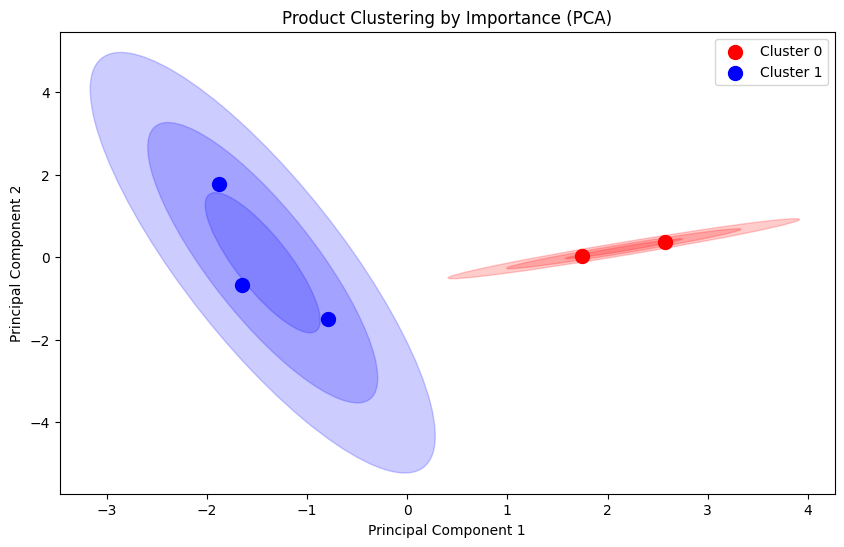

In [ ]:
#크림
# 구글 코랩에서 실행할 수 있는 Python 코드입니다.

# Step 1: 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Step 2: 데이터 정의하기
# 5개의 제품에 각각 5개의 항목에 대한 중요도 값이 있다고 가정합니다.
# 예시 데이터 (제품 5개, 항목 5개)
importance_values = np.array([
    [83.6651, 34.6162, 32.3935, 21.0897, 16.5198],  # 제품 1 닥터지(기능성, 사용감, 특성, 타입, 반응)
    [67.4062, 32.1086, 24.4290, 15.0213, 24.0132],  # 제품 2 라운드랩
    [57.4604, 27.1139, 34.4498, 28.6085, 37.3190],  # 제품 3 에스트라
    [48.8191, 28.0326, 33.9426, 26.0920, 29.0326],  # 제품 4 피지오겔
    [50.3952, 33.7845, 22.8021, 21.9918, 24.9028]   # 제품 5 토리든
])

# 데이터프레임으로 변환 (각 제품의 중요도 값을 피처로 사용)
data = pd.DataFrame(importance_values, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])

# Step 3: 데이터 표준화 (K-means는 데이터의 크기에 민감합니다.)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
#Step 4: K-means 클러스터링 수행
# 클러스터 개수를 설정 (예: 2개의 클러스터로 분류)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# 클러스터 라벨을 데이터프레임에 추가
data['Cluster'] = kmeans.labels_

# Step 5: 결과 출력
print(data)

# 클러스터 시각화 (PCA를 사용하여 2D 시각화)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
data_pca['Cluster'] = data['Cluster']

# Function to draw ellipses
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # 최소 크기 설정
    min_size = 0.1
    width = max(width, min_size)
    height = max(height, min_size)

    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

plt.figure(figsize=(10, 6))
ax = plt.gca()

# 색상 설정
colors = ['red', 'blue']

for cluster in np.unique(data_pca['Cluster']):
    cluster_data = data_pca[data_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', s=100, c=colors[cluster])

    # 클러스터의 중심 계산
    cluster_center = cluster_data[['PC1', 'PC2']].mean(axis=0)

    # 클러스터 내 데이터의 공분산 행렬 계산
    covariance = np.cov(cluster_data[['PC1', 'PC2']].T)

    # 원 그리기
    draw_ellipse(cluster_center, covariance, ax=ax, alpha=0.2, color=colors[cluster])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Product Clustering by Importance (PCA)')
plt.legend()
plt.show()

   Feature1  Feature2  Feature3  Feature4  Feature5  Cluster
0   83.6651   34.6162   32.3935   21.0897   16.5198        2
1   67.4062   32.1086   24.4290   15.0213   24.0132        1
2   57.4604   27.1139   34.4498   28.6085   37.3190        0
3   48.8191   28.0326   33.9426   26.0920   29.0326        0
4   50.3952   33.7845   22.8021   21.9918   24.9028        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-ee6fbd01cf91>:81: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,
<ipython-input-10-ee6fbd01cf91>:81: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,
<ipython-input-12-ffea09db6f73>:61: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariance = np.cov(cluster_data[['PC1', 'PC2']].T)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_

LinAlgError: SVD did not converge

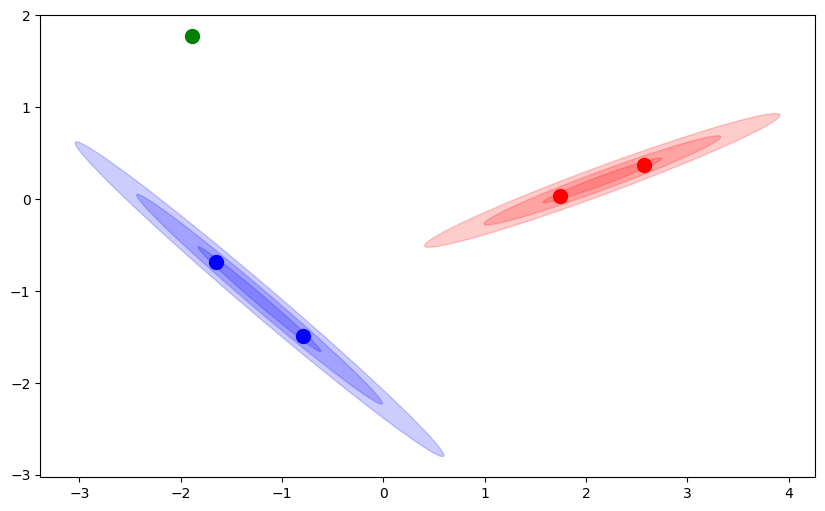

In [ ]:
#클러스터3개
# 구글 코랩에서 실행할 수 있는 Python 코드입니다.

# Step 1: 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Step 2: 데이터 정의하기
# 5개의 제품에 각각 5개의 항목에 대한 중요도 값이 있다고 가정합니다.
# 예시 데이터 (제품 5개, 항목 5개)
importance_values = np.array([
    [83.6651, 34.6162, 32.3935, 21.0897, 16.5198],  # 제품 1 닥터지(기능성, 사용감, 특성, 타입, 반응)
    [67.4062, 32.1086, 24.4290, 15.0213, 24.0132],  # 제품 2 라운드랩
    [57.4604, 27.1139, 34.4498, 28.6085, 37.3190],  # 제품 3 에스트라
    [48.8191, 28.0326, 33.9426, 26.0920, 29.0326],  # 제품 4 피지오겔
    [50.3952, 33.7845, 22.8021, 21.9918, 24.9028]   # 제품 5 토리든
])

# 데이터프레임으로 변환 (각 제품의 중요도 값을 피처로 사용)
data = pd.DataFrame(importance_values, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])

# Step 3: 데이터 표준화 (K-means는 데이터의 크기에 민감합니다.)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# Step 4: K-means 클러스터링 수행 (클러스터 개수를 3으로 설정)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# 클러스터 라벨을 데이터프레임에 추가
data['Cluster'] = kmeans.labels_

# Step 5: 결과 출력
print(data)

# 클러스터 시각화 (PCA를 사용하여 2D 시각화)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
data_pca['Cluster'] = data['Cluster']

plt.figure(figsize=(10, 6))
ax = plt.gca()

# 색상 설정 (클러스터 개수에 맞게 조정)
colors = ['red', 'blue', 'green']

for cluster in np.unique(data_pca['Cluster']):
    cluster_data = data_pca[data_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', s=100, c=colors[cluster])

    # 클러스터의 중심 계산
    cluster_center = cluster_data[['PC1', 'PC2']].mean(axis=0)

    # 클러스터 내 데이터의 공분산 행렬 계산
    covariance = np.cov(cluster_data[['PC1', 'PC2']].T)

    # 원 그리기
    draw_ellipse(cluster_center, covariance, ax=ax, alpha=0.2, color=colors[cluster])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Product Clustering by Importance (PCA)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

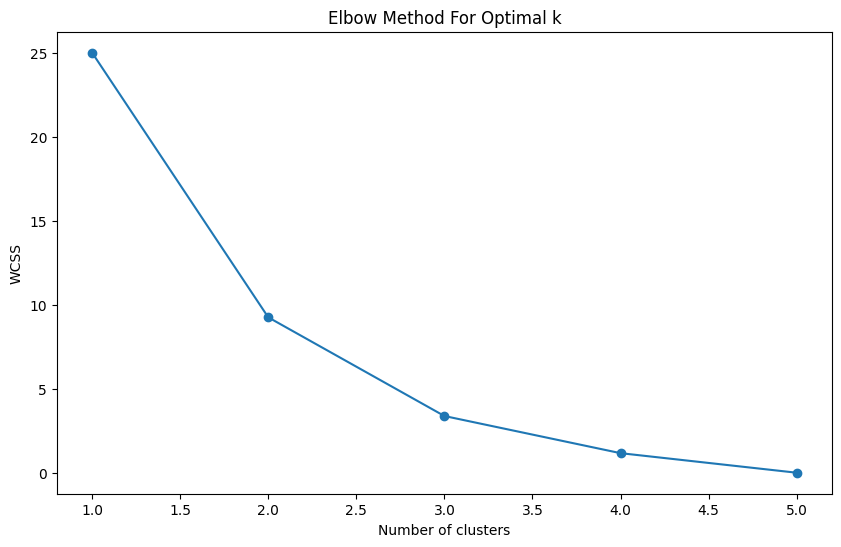

   Feature1  Feature2  Feature3  Feature4  Feature5  Cluster
0   83.6651   34.6162   32.3935   21.0897   16.5198        1
1   67.4062   32.1086   24.4290   15.0213   24.0132        1
2   57.4604   27.1139   34.4498   28.6085   37.3190        0
3   48.8191   28.0326   33.9426   26.0920   29.0326        0
4   50.3952   33.7845   22.8021   21.9918   24.9028        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#엘보우 기법을 이용한 k개수 판단
# 구글 코랩에서 실행할 수 있는 Python 코드입니다.

# Step 1: 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Step 2: 데이터 정의하기
# 5개의 제품에 각각 5개의 항목에 대한 중요도 값이 있다고 가정합니다.
# 예시 데이터 (제품 5개, 항목 5개)
importance_values = np.array([
    [83.6651, 34.6162, 32.3935, 21.0897, 16.5198],  # 제품 1 닥터지(기능성, 사용감, 특성, 타입, 반응)
    [67.4062, 32.1086, 24.4290, 15.0213, 24.0132],  # 제품 2 라운드랩
    [57.4604, 27.1139, 34.4498, 28.6085, 37.3190],  # 제품 3 에스트라
    [48.8191, 28.0326, 33.9426, 26.0920, 29.0326],  # 제품 4 피지오겔
    [50.3952, 33.7845, 22.8021, 21.9918, 24.9028]   # 제품 5 토리든
])

# 데이터프레임으로 변환 (각 제품의 중요도 값을 피처로 사용)
data = pd.DataFrame(importance_values, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])

# Step 3: 데이터 표준화 (K-means는 데이터의 크기에 민감합니다.)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 4: 엘보우 기법을 사용하여 최적의 클러스터 개수 찾기
wcss = []
max_clusters = len(data)  # 클러스터 개수를 데이터 샘플 수 이하로 제한
for i in range(1, max_clusters + 1):  # 클러스터 개수를 1부터 데이터 샘플 수까지 테스트
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# WCSS 값을 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

# Step 5: 최적의 클러스터 개수 선택 (엘보우 기법을 통해 k=2 선택)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

# 클러스터 라벨을 데이터프레임에 추가
data['Cluster'] = kmeans.labels_

# Step 6: 결과 출력
print(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

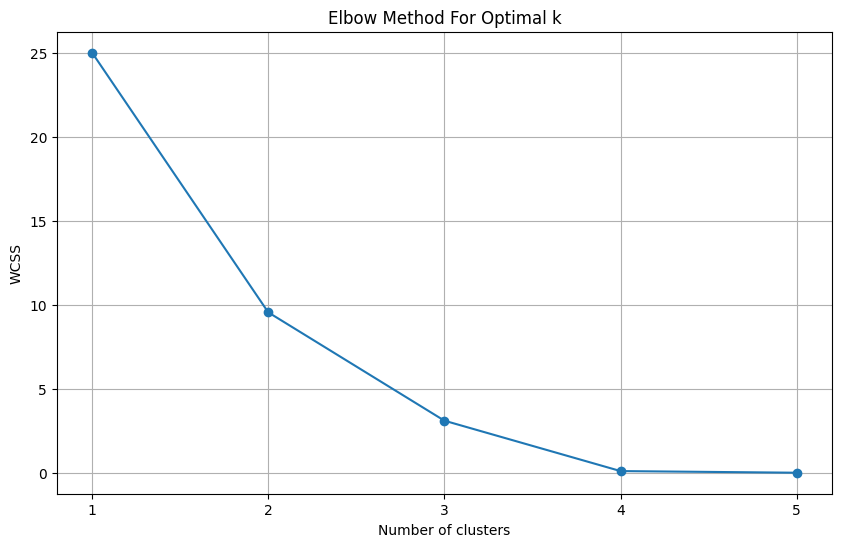

   Feature1  Feature2  Feature3  Feature4  Feature5  Cluster
0   37.3322   41.5623   43.1336   12.8679   30.1282        0
1   36.1789   41.9610   46.2894   12.2381   27.5720        0
2   67.0829   29.7951   64.6114   17.7101    7.3543        1
3   42.3720   25.5205   26.7280   10.8329   41.6225        0
4   42.1373   23.8205   42.1456   15.6955   33.5214        0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1]:
#클러스터 결과레서 1.5이렇게 나온거 제거
# Step 1: 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 2: 데이터 정의하기
# 5개의 제품에 각각 5개의 항목에 대한 중요도 값이 있다고 가정합니다.
# 예시 데이터 (제품 5개, 항목 5개)
importance_values = np.array([
    [37.3322, 41.5623, 43.1336, 12.8679, 30.1282],  # 제품 1 토리든 (기능성, 사용감, 특성, 타입, 반응)
    [36.1789, 41.961, 46.2894, 12.2381, 27.572],  # 제품 2 라운드랩
    [67.0829, 29.7951, 64.6114, 17.7101, 7.3543],  # 제품 3 바이오더마
    [42.372, 25.5205, 26.728, 10.8329, 41.6225],  # 제품 4 아비브
    [42.1373, 23.8205, 42.1456, 15.6955, 33.5214]   # 제품 5 브링그린
])

# 데이터프레임으로 변환 (각 제품의 중요도 값을 피처로 사용)
data = pd.DataFrame(importance_values, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])

# Step 3: 데이터 표준화 (K-means는 데이터의 크기에 민감합니다.)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 4: 엘보우 기법을 사용하여 최적의 클러스터 개수 찾기
wcss = []
max_clusters = len(data)  # 클러스터 개수를 데이터 샘플 수 이하로 제한
for i in range(1, max_clusters + 1):  # 클러스터 개수를 1부터 데이터 샘플 수까지 테스트
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# WCSS 값을 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xticks(range(1, max_clusters + 1))  # x축 눈금을 정수로 설정
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Step 5: 최적의 클러스터 개수 선택 (엘보우 기법을 통해 k=2 선택)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

# 클러스터 라벨을 데이터프레임에 추가
data['Cluster'] = kmeans.labels_

# Step 6: 결과 출력
print(data)


   Feature1  Feature2  Feature3  Feature4  Feature5  Cluster
0   37.3322   41.5623   43.1336   12.8679   30.1282        0
1   36.1789   41.9610   46.2894   12.2381   27.5720        0
2   67.0829   29.7951   64.6114   17.7101    7.3543        1
3   42.3720   25.5205   26.7280   10.8329   41.6225        0
4   42.1373   23.8205   42.1456   15.6955   33.5214        0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-14-85e6a51787e4>:65: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,
<ipython-input-14-85e6a51787e4>:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariance = np.cov(cluster_data[['PC1', 'PC2']].T)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


LinAlgError: SVD did not converge

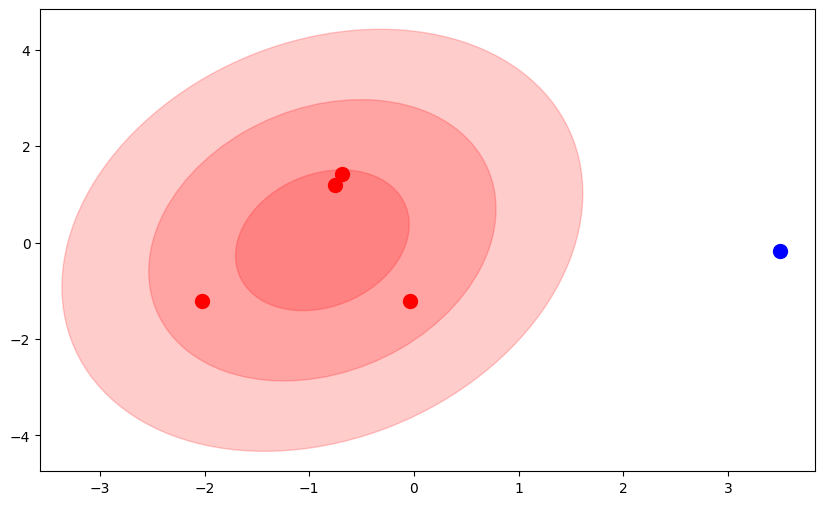

In [ ]:
#토
# 구글 코랩에서 실행할 수 있는 Python 코드입니다.

# Step 1: 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Step 2: 데이터 정의하기
# 5개의 제품에 각각 5개의 항목에 대한 중요도 값이 있다고 가정합니다.
# 예시 데이터 (제품 5개, 항목 5개)
importance_values = np.array([
    [37.3322, 41.5623, 43.1336, 12.8679, 30.1282],  # 제품 1 토리든 (기능성, 사용감, 특성, 타입, 반응)
    [36.1789, 41.961, 46.2894, 12.2381, 27.572],  # 제품 2 라운드랩
    [67.0829, 29.7951, 64.6114, 17.7101, 7.3543],  # 제품 3 바이오더마
    [42.372, 25.5205, 26.728, 10.8329, 41.6225],  # 제품 4 아비브
    [42.1373, 23.8205, 42.1456, 15.6955, 33.5214]   # 제품 5 브링그린
])

# 데이터프레임으로 변환 (각 제품의 중요도 값을 피처로 사용)
data = pd.DataFrame(importance_values, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])

# Step 3: 데이터 표준화 (K-means는 데이터의 크기에 민감합니다.)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
#Step 4: K-means 클러스터링 수행
# 클러스터 개수를 설정 (예: 2개의 클러스터로 분류)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# 클러스터 라벨을 데이터프레임에 추가
data['Cluster'] = kmeans.labels_

# Step 5: 결과 출력
print(data)

# 클러스터 시각화 (PCA를 사용하여 2D 시각화)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
data_pca['Cluster'] = data['Cluster']

# Function to draw ellipses
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # 최소 크기 설정
    min_size = 0.1
    width = max(width, min_size)
    height = max(height, min_size)

    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

plt.figure(figsize=(10, 6))
ax = plt.gca()

# 색상 설정
colors = ['red', 'blue']

for cluster in np.unique(data_pca['Cluster']):
    cluster_data = data_pca[data_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', s=100, c=colors[cluster])

    # 클러스터의 중심 계산
    cluster_center = cluster_data[['PC1', 'PC2']].mean(axis=0)

    # 클러스터 내 데이터의 공분산 행렬 계산
    covariance = np.cov(cluster_data[['PC1', 'PC2']].T)

    # 원 그리기
    draw_ellipse(cluster_center, covariance, ax=ax, alpha=0.2, color=colors[cluster])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Product Clustering by Importance (PCA)')
plt.legend()
plt.show()

In [ ]:
#토너
    [37.3322, 41.5623, 43.1336, 12.8679, 30.1282],  # 제품 1 토리든 (기능성, 사용감, 특성, 타입, 반응)
    [36.1789, 41.961, 46.2894, 12.2381, 27.572],  # 제품 2 라운드랩
    [67.0829, 29.7951, 64.6114, 17.7101, 7.3543],  # 제품 3 바이오더마
    [42.372, 25.5205, 26.728, 10.8329, 41.6225],  # 제품 4 아비브
    [42.1373, 23.8205, 42.1456, 15.6955, 33.5214]   # 제품 5 브링그린

#로션
[83.6651, 34.6162, 32.3935, 21.0897, 16.5198],  # 제품 1 닥터지(기능성, 사용감, 특성, 타입, 반응)
    [67.4062, 32.1086, 24.4290, 15.0213, 24.0132],  # 제품 2 라운드랩
    [57.4604, 27.1139, 34.4498, 28.6085, 37.3190],  # 제품 3 에스트라
    [48.8191, 28.0326, 33.9426, 26.0920, 29.0326],  # 제품 4 피지오겔
    [50.3952, 33.7845, 22.8021, 21.9918, 24.9028]   # 제품 5 토리든
